In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM , Embedding , Flatten ,Dense , SimpleRNN
import matplotlib.pyplot as plt
from keras.regularizers import l2

In [2]:
#df = pd.read_csv(r"C:\Users\mahesh\FERGUSSON\SEM 3\Final year Project\labelled_data.csv")

In [3]:
df.isnull().sum()

Unnamed: 0            0
rating_by_reviewer    0
cleaned_review        0
Sentiment             0
dtype: int64

In [4]:
df.drop("Unnamed: 0", axis = 1 , inplace = True)
df

,rating_by_reviewer,cleaned_review,Sentiment
0,1,cant hear others voice call often restart phon...,NEGATIVE
1,1,dear friend request please dont buy samsung be...,NEGATIVE
2,1,bad service flipkart buy ever never defect set...,NEGATIVE
3,1,good,NEGATIVE
4,1,camera quality poor person may please purchase...,NEGATIVE
...,...,...,...
49995,5,awesome phone performance good buy phone right...,POSITIVE
49996,5,beautiful mobile phonevery nice sound quality,POSITIVE
49997,5,good phone,POSITIVE
49998,5,super,POSITIVE


In [5]:
# Shuffling the data rows
df = df.sample(50000)
df = df.sample(50000)
df = df.sample(50000)
df = df.sample(50000)
df = df.sample(50000)

In [6]:
df.isnull().sum()

rating_by_reviewer    0
cleaned_review        0
Sentiment             0
dtype: int64

In [7]:
df['Sentiment'].replace("POSITIVE",0,inplace = True)
df['Sentiment'].replace("NEGATIVE",1,inplace = True)
df['Sentiment'] = df['Sentiment'].astype("float32")

In [8]:
X_train, X_test , y_train , y_test = train_test_split(df['cleaned_review'] , df['Sentiment'] , test_size= 0.25 , random_state= 42)

# Tokenizing and preprocessing the data

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train , maxlen= 10)

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test , maxlen= 10)

In [11]:
print("sample : \n" ,"Training : ", X_train[12] ,"\n","Testing :", X_test[12])

sample : 
 Training :  [ 0  0  0  0  0  0  1  7 46 17] 
 Testing : [  0   0   0   0   0   0   0 526  32   1]


# RNN MODEL

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 10)          500       
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                210       
                                                                 
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
60/60 [==============================] - 13s 36ms/step - loss: 1.0610 - accuracy: 0.4814 - val_loss: 0.7899 - val_accuracy: 0.5451
Epoch 2/3
60/60 [===========================

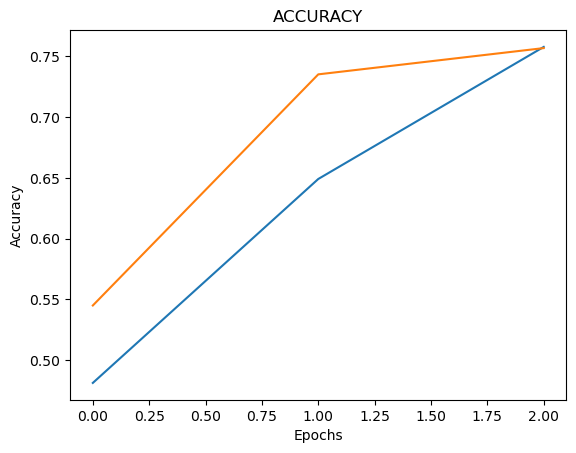

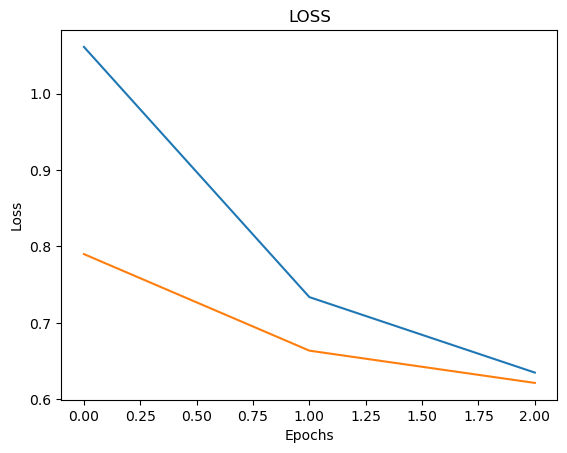

TRAINING SCORE :  0.7616000175476074
TESTING SCORE :  0.501039981842041


In [12]:
model_1 = Sequential()

model_1.add(Embedding(50 , 10 ))
model_1.add(SimpleRNN(10 , kernel_regularizer= l2(0.01)))
model_1.add(Flatten())
model_1.add(Dense(1 , activation="tanh"))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print(model_1.summary())


history = model_1.fit(X_train , y_train , batch_size=500, epochs=3 , validation_split=0.2 , verbose = 1 )



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")
plt.show()

print("TRAINING SCORE : ",model_1.evaluate(X_train,y_train,verbose = 0)[1])
print("TESTING SCORE : ",model_1.evaluate(X_test,y_test,verbose = 0)[1])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 10)          500       
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, None, 10)          210       
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 10)                210       
                                                                 
 flatten_8 (Flatten)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
60/60 [==============================] -

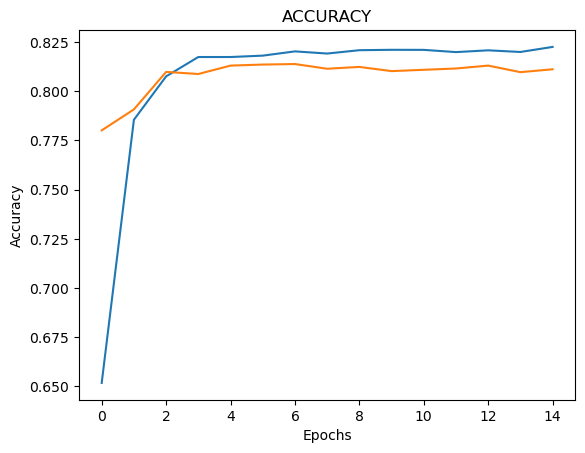

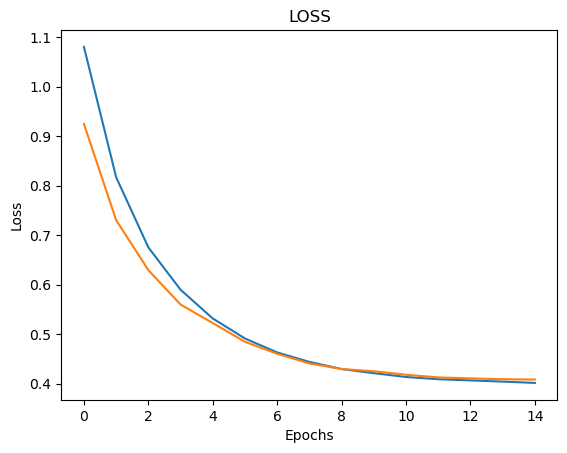

TRAINING SCORE :  0.819973349571228
TESTING SCORE :  0.6790400147438049


In [33]:
model_2 = Sequential()

model_2.add(Embedding(50 , 10 ))
model_2.add(SimpleRNN(10, input_shape = (10,1) , return_sequences=True))
model_2.add(SimpleRNN(10 , kernel_regularizer= l2(0.05) ) )
model_2.add(Flatten())
model_2.add(Dense(1 , activation="sigmoid"))

model_2.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])


print(model_2.summary())


history = model_2.fit(X_train , y_train , batch_size=500, epochs=15 , validation_split=0.2 , verbose = 1 )



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")
plt.show()

print("TRAINING SCORE : ",model_2.evaluate(X_train,y_train,verbose = 0)[1])
print("TESTING SCORE : ",model_2.evaluate(X_test,y_test,verbose = 0)[1])

In [34]:
y_pred = model_2.predict(X_test)

391/391 [==============================] - 3s 8ms/step


# Conversion to classes


In [35]:
def conversion(i):
    if i>=0.5:
        return 1
    else :
        return 0
    
    

y_pred = y_pred.reshape(1,-1)[0]
y_pred = pd.Series(y_pred)
y_pred = y_pred.apply(conversion)

In [36]:
from sklearn.metrics import confusion_matrix , classification_report

In [37]:
confusion_matrix(y_test , y_pred)

array([[4213, 2050],
       [1962, 4275]], dtype=int64)

In [38]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.67      0.68      6263
         1.0       0.68      0.69      0.68      6237

    accuracy                           0.68     12500
   macro avg       0.68      0.68      0.68     12500
weighted avg       0.68      0.68      0.68     12500

